In [1]:
#Modo 1 de importar o dataset.
from google.colab import files
import pandas as pd
import io
uploaded_file = files.upload()


Saving Salary_dataset.csv to Salary_dataset.csv


In [2]:
# Criar o DataFrame a partir do arquivo enviado
filename = list(uploaded_file.keys())[0]   # Pega o nome do arquivo enviado automaticamente
df = pd.read_csv(io.BytesIO(uploaded_file[filename]))

# Exibir as 5 primeiras linhas do dataset
print("Primeiras linhas do dataset:")
display(df.head())

# Verificar dimensão do dataset
print("\nDimensões (linhas, colunas):", df.shape)

# Verificar se existem valores ausentes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())

# Verificar tipos de dados
print("\nTipos de dados por coluna:")
print(df.dtypes)


Primeiras linhas do dataset:


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0



Dimensões (linhas, colunas): (30, 3)

Valores faltantes por coluna:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Tipos de dados por coluna:
Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object


In [3]:
# Remover a coluna desnecessária
df = df.drop(columns=['Unnamed: 0'])

# Conferir novamente o dataset
df.head()


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
# Variável independente (entrada)
X = df[['YearsExperience']]   # escrito entre colchetes duplos para manter formato de DataFrame

# Variável dependente (saída)
y = df['Salary']


Importar modelo e treinar

In [5]:
from sklearn.linear_model import LinearRegression

# Criar o modelo
linear_model = LinearRegression()

# Treinar o modelo
linear_model.fit(X, y)


LinearRegression()

Ver os parametros aprendidos

In [6]:
# Coeficiente angular (quanto o salário aumenta por ano)
beta_1 = linear_model.coef_[0]

# Intercepto (salário base)
beta_0 = linear_model.intercept_

print("β₁ (inclinação):", beta_1)
print("β₀ (intercepto):", beta_0)


β₁ (inclinação): 9449.962321455077
β₀ (intercepto): 24848.203966523193


Inicio da regressão

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Previsões do modelo
y_pred = linear_model.predict(X)

# Cálculo das métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"RMSE (Raiz do Erro Quadrático): {rmse:.2f}")


R² (Coeficiente de Determinação): 0.9570
MAE (Erro Absoluto Médio): 4644.20
MSE (Erro Quadrático Médio): 31270951.72
RMSE (Raiz do Erro Quadrático): 5592.04


Gráfico

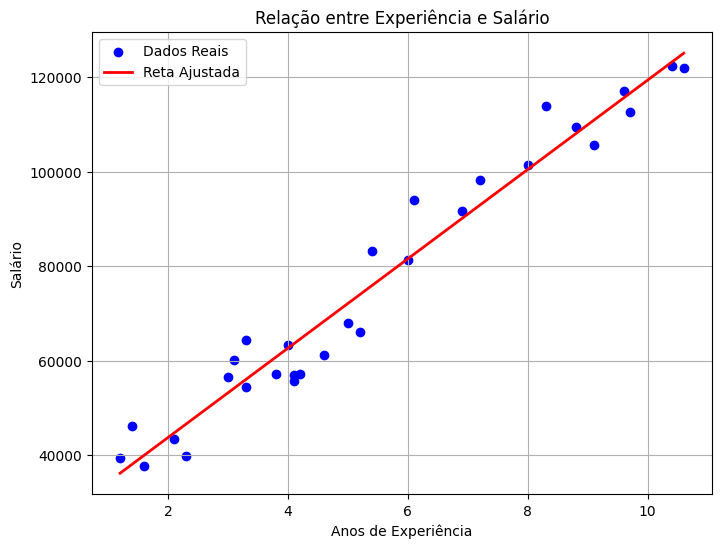

In [8]:
import matplotlib.pyplot as plt

# Scatter Plot dos dados originais
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Dados Reais')

# Reta da Regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Reta Ajustada')

# Títulos e legenda
plt.title('Relação entre Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.grid(True)

plt.show()
